## NAME: Mithun Muralidhar
## ASU ID: 1211309824

# Homework 2 Problem 3


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed, what can we do about it??
Please apply the log transformation on the price and plot the distribution of the sale price, is it more normal?

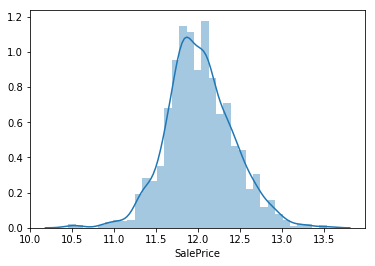

In [78]:
train['SalePrice']=np.log(train['SalePrice'])
sns.distplot(train['SalePrice'])
plt.savefig('logtrain.png')


### Preprocessing: Deal with the missing data (NA) and create dummy variable for categorical variables

Please use the mean of the training data to fit in the NA in both training and testing data set. Please also create dummy variables for all the text dataset.

In [79]:
# Put your code here
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [80]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216



## Handling Missing values

### Numeric variables

In [81]:
train_new= train.fillna(value=train.mean())
test_new=test.fillna(value=test.mean())

In [82]:
sum(train_new.isnull().sum()!=0)

16

In [83]:
sum(test_new.isnull().sum()!=0)

22

In [84]:
train_dum=pd.get_dummies(train_new)
test_dum=pd.get_dummies(test_new)

In [85]:
sum(train_dum.isnull().sum()!=0)

0

In [86]:
y=train_dum['SalePrice']

In [87]:
y.drop(y.index[1459], inplace=True)

In [88]:
train_dum.drop(['SalePrice', 'Id'], axis=1, inplace=True)

In [89]:
train_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(252)
memory usage: 770.0 KB


In [90]:
miss=set(train_dum.columns)- set(test_dum.columns)
for i in miss:
    test_dum[i]=0
    
test_dum=test_dum[train_dum.columns]

In [91]:
train_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(252)
memory usage: 770.0 KB


In [92]:
train_dum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [93]:
test_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(43), uint8(234)
memory usage: 949.0 KB


In [94]:
train_dum.drop(train_dum.index[1459], inplace=True)

In [95]:
train_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(252)
memory usage: 780.8 KB


## Categorical variables 

### Model 1: Use Ridge regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


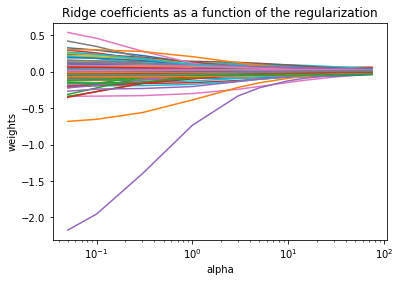

In [96]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridge=Ridge()
coeff_values=[]
for i in alphas:
    ridge.set_params(alpha=i)
    ridge.fit((train_dum),y)
    coeff_values.append(ridge.coef_)
axis=plt.gca()
axis.plot(alphas, coeff_values)
axis.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.savefig('ridge.png')


### Trying Ridge with different tuning parameter alpha

[0.31538321031506428, 0.3148292862982715, 0.31318846100001069, 0.31060341609494035, 0.30774574506694286, 0.30628668919129781, 0.30417388399762224, 0.30285216667803194, 0.30041423846849452, 0.29846230077471092, 0.29682048741842942]
0.306432716846


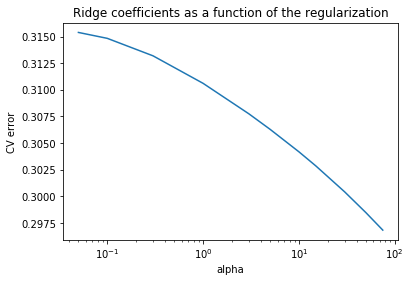

In [97]:
from sklearn.metrics import mean_squared_error
mse=[]
ridge=Ridge()
for i in alphas:
    ridge.set_params(alpha=i)
    ridge.fit(train_dum,y)
    pred=ridge.predict(test_dum)
    mse.append(np.mean(mean_squared_error(y, pred)))
    
print(mse)
print(np.mean(mse))
axis=plt.gca()
axis.plot(alphas, mse)
axis.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('CV error')
plt.title('Ridge coefficients as a function of the regularization')
plt.savefig('cve1&alpha.png')




### Compute Regularization path using RidgeCV

In [98]:
ridgecv=RidgeCV(alphas=alphas,scoring='neg_mean_squared_error')
ridgecv.fit((train_dum), y)

RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [99]:
ridgecv.alpha_

10.0

### Model with alpha chosen by CV

In [100]:
ridge2= Ridge()
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit((train_dum), y)
pred2=ridge2.predict((test_dum))
print("RMSE is:", mean_squared_error(y, pred2))

RMSE is: 0.304173883998


### Applying Ridge model on testing dataset to compare performance

In [101]:
test_pred=ridge2.predict(test_dum)

In [102]:
np.exp(test_pred)

array([ 113732.81647612,  149449.48482876,  171345.75377362, ...,
        159712.01334373,  111954.83515282,  226064.39594212])

### Model 2: Use Lasso regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


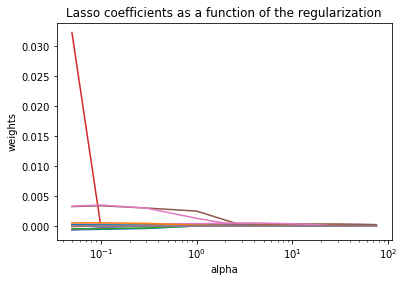

In [103]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso_coeff=[]

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit((train_dum),y)
    pred=lasso.predict((test_dum))
    lasso_coeff.append(lasso.coef_)

ax=plt.gca()
ax.plot(alphas, lasso_coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.savefig('Lasso.png')



[0.28087988728729008, 0.27787193440383989, 0.27354742353378603, 0.26240073591282215, 0.24979018842010167, 0.24509220719862918, 0.23478318558847838, 0.22565938404046113, 0.2057898449053783, 0.18865420470396066, 0.17436315781022818]
0.238075650346


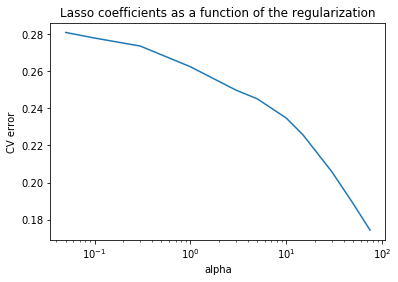

In [104]:
mse=[]
lasso=Lasso()
for i in alphas:
    lasso.set_params(alpha=i)
    lasso.fit(train_dum,y)
    pred=lasso.predict(test_dum)
    mse.append(np.mean(mean_squared_error(y, pred)))
    
print(mse)
print(np.mean(mse))
axis=plt.gca()
axis.plot(alphas, mse)
axis.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('CV error')
plt.title('Lasso coefficients as a function of the regularization')
plt.savefig('lasso_cve.png')


### Compute Regularization using LassoCV

In [105]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit((train_dum), y)


LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=10000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [106]:
lassocv.alpha_

0.050000000000000003

### Best alpha for this dataset

In [107]:
lassocv1 = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv1.fit((train_dum), y)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [108]:
lassocv1.alpha_

1.0258946939435298

In [109]:
lasso=Lasso()
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit((train_dum), y)
pred_best= lasso.predict((test_dum))
print("RMSE is:" , mean_squared_error(y, pred_best))

RMSE is: 0.280879887287


In [110]:
# Performance of Lasso model on test data
lasso_test= lassocv.predict(test_dum)
np.exp(lasso_test)

array([ 139363.78163446,  145156.36685373,  192310.17166384, ...,
        178638.59714107,  124175.17586695,  233422.83339617])